In [1]:
import numpy as np
import scipy as sc
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from opt_utils import *
from grad_utils import *
%matplotlib inline

# load data

In [2]:
data = np.load('simulation_data.npy')
latent = np.load('simulation_latent.npy')

# parameters

In [3]:
# optimization parameters
l_penalty = 1
max_iter = 1000
ths = 1e-12

# vanilla PGD parameters
step_size = 0.03

# backtracking parameters
step_init = 0.1
max_back = 100
a = 0.2
b = 0.5

# L2 penalty

## Gradient Descent

In [3]:
objective_gd, beta_gd = gd_l2(data = data,verbose = True)

initial objective value: 13028.394406
1-th GD, objective value: 11475.275064
2-th GD, objective value: 10990.793227
3-th GD, objective value: 10790.800416
4-th GD, objective value: 10692.568307
5-th GD, objective value: 10638.863073
6-th GD, objective value: 10607.323658
7-th GD, objective value: 10587.828040
8-th GD, objective value: 10575.301454
9-th GD, objective value: 10567.003469
10-th GD, objective value: 10561.368650
11-th GD, objective value: 10557.462459
12-th GD, objective value: 10554.706771
13-th GD, objective value: 10552.733236
14-th GD, objective value: 10551.301230
15-th GD, objective value: 10550.250166
16-th GD, objective value: 10549.470847
17-th GD, objective value: 10548.887792
18-th GD, objective value: 10548.448060
19-th GD, objective value: 10548.114032
20-th GD, objective value: 10547.858659
21-th GD, objective value: 10547.662285
22-th GD, objective value: 10547.510492
23-th GD, objective value: 10547.392604
24-th GD, objective value: 10547.300660
25-th GD, o

## ADMM

In [4]:
objective_admm, objective_admm_b_l2, beta_admm = admm_l2(data = data,verbose = True,return_b_obj = True)

initial objective value: 13028.394406
1-th ADMM, objective value: 10632.145574
2-th ADMM, objective value: 10568.013852
3-th ADMM, objective value: 10548.058020
4-th ADMM, objective value: 10540.345210
5-th ADMM, objective value: 10537.010260
6-th ADMM, objective value: 10535.459615
7-th ADMM, objective value: 10534.694093
8-th ADMM, objective value: 10534.294671
9-th ADMM, objective value: 10534.074931
10-th ADMM, objective value: 10533.947808
11-th ADMM, objective value: 10533.870783
12-th ADMM, objective value: 10533.822165
13-th ADMM, objective value: 10533.790391
14-th ADMM, objective value: 10533.769025
15-th ADMM, objective value: 10533.754325
16-th ADMM, objective value: 10533.744027
17-th ADMM, objective value: 10533.736710
18-th ADMM, objective value: 10533.731454
19-th ADMM, objective value: 10533.727644
20-th ADMM, objective value: 10533.724863
21-th ADMM, objective value: 10533.722823
22-th ADMM, objective value: 10533.721318
23-th ADMM, objective value: 10533.720204
24-th

c:\python\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


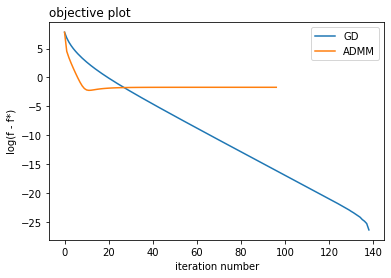

In [5]:
f = plt.figure(1, figsize = (6,4))
# obj_opt = np.min([np.min(objective_gd), 
#                   np.min(objective_admm)])
# plt.plot(np.log(objective_gd - obj_opt), label="GD")
# plt.plot(np.log(objective_admm - obj_opt), label="ADMM")

obj_opt = np.min([np.min(objective_gd), 
                  np.min(objective_admm_b_l2)])
plt.plot(np.log(objective_gd - obj_opt), label="GD")
plt.plot(np.log(objective_admm_b_l2 - obj_opt), label="ADMM")


plt.title("objective plot", loc='left')
plt.xlabel("iteration number")
plt.ylabel("log(f - f*)")
plt.legend()
f.savefig("converge_curve_l2.pdf", bbox_inches='tight')

c:\python\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


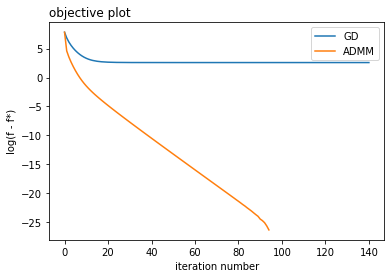

In [6]:
f = plt.figure(1, figsize = (6,4))
obj_opt = np.min([np.min(objective_gd), 
                  np.min(objective_admm)])
plt.plot(np.log(objective_gd - obj_opt), label="GD")
plt.plot(np.log(objective_admm - obj_opt), label="ADMM")

# obj_opt = np.min([np.min(objective_gd), 
#                   np.min(objective_admm_b_l2)])
# plt.plot(np.log(objective_gd - obj_opt), label="GD")
# plt.plot(np.log(objective_admm_b_l2 - obj_opt), label="ADMM")


plt.title("objective plot", loc='left')
plt.xlabel("iteration number")
plt.ylabel("log(f - f*)")
plt.legend()
f.savefig("converge_curve_l2.pdf", bbox_inches='tight')

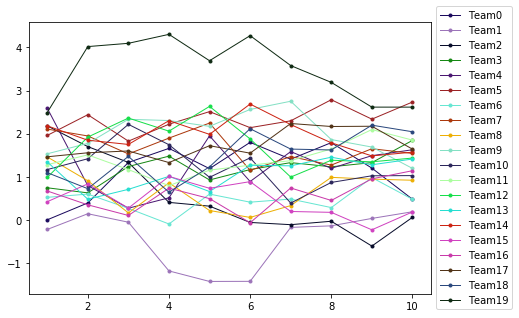

In [7]:
T, N = data.shape[0:2]
beta = beta_admm.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=np.random.rand(3,),marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
f.savefig("l2_solution.pdf", bbox_inches='tight')